# Overview of the Code



- Data Loading and Preprocessing:

Data from NASDAQ stock prices is loaded, and the 'Open' prices are used for analysis.
The data is scaled to the range [0, 1] using Min-Max scaling to normalize the input features.

- Feature and Label Generation:

Sequences of features and labels are created for training the LSTM model.
time_steps define the number of past time steps to consider when creating sequences.
The features are the 'Open' prices of the stock for the specified time steps, and labels are the next 'Open' price.

- LSTM Model Architecture:

A Sequential model is used with multiple LSTM layers and Dropout layers for regularization.
The model is designed to learn temporal patterns and dependencies in the stock price data.

- Training the Model:

The model is compiled with the Adam optimizer and mean squared error loss.
It is then trained on the generated features and labels for a specified number of epochs.
- Visualization of Training Loss:

The training loss over epochs is visualized to assess the convergence and performance of the model.

- Testing the Model:

The trained model is tested on the unseen test data.
Test features are prepared in a similar manner as the training features.
Predictions are made on the test features and scaled back to the original range.

- Visualization of Predictions:

The actual NASDAQ stock prices and the predicted prices are plotted to visually assess the performance of the model.




## How LSTM Models Work for Stock Prediction:

- Temporal Dependency: LSTM models are well-suited for sequences with long-term dependencies, making them effective for time series data like stock prices.

- Memory Cells:LSTMs use memory cells to store and retrieve information over long sequences.
This helps in capturing patterns and trends that may have a longer-term impact on stock prices.

- Ability to Learn Sequences:LSTMs can learn from sequences of data, making them capable of capturing complex patterns in stock price movements over time.

- Handling Non-Linearity:Stock prices often exhibit non-linear patterns, and LSTMs can effectively model such non-linear relationships.

- Regularization with Dropout:Dropout layers are added to prevent overfitting by randomly dropping out connections during training.

- Normalization:Min-Max scaling normalizes the input features, helping the model converge faster and preventing the dominance of certain features.
In summary, LSTM models are powerful tools for stock price prediction as they can capture long-term dependencies and intricate patterns in time series data. The architecture, regularization, and normalization techniques used in the code contribute to the model's ability to make meaningful predictions. The visualizations provide an intuitive way to assess the model's performance.

# NASDAQ STOCKS

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 60, 50)            10400     
                                                                 
 dropout_8 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_9 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_9 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_10 (LSTM)              (None, 60, 50)            20200     
                                                                 
 dropout_10 (Dropout)        (None, 60, 50)            0         
                                                                 
 lstm_11 (LSTM)              (None, 50)               

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


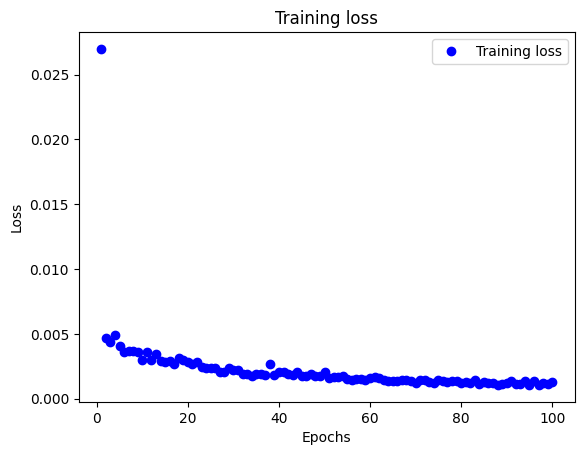

7/7 [==============================] - 1s 8ms/step


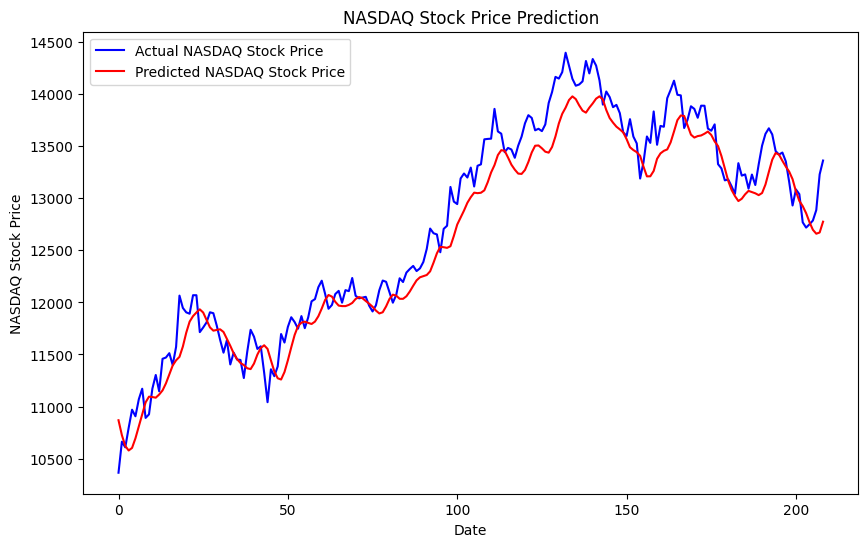

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.utils import timeseries_dataset_from_array

# Load the NASDAQ training and testing data
nasdaq_training_complete = pd.read_csv('/content/^IXIC (4).csv')
nasdaq_testing_complete = pd.read_csv('/content/^IXIC (5).csv')

# Data preprocessing - Scaling 'Open' prices to be in the range [0, 1]
scaler = MinMaxScaler(feature_range=(0, 1))
nasdaq_training_processed = scaler.fit_transform(nasdaq_training_complete['Open'].values.reshape(-1, 1))

# Generate features and labels for training
time_steps = 60  # Number of time steps
features_set = []
labels = []

# Creating sequences of features and labels
for i in range(time_steps, len(nasdaq_training_processed)):
    features_set.append(nasdaq_training_processed[i - time_steps:i, 0])
    labels.append(nasdaq_training_processed[i, 0])

features_set, labels = np.array(features_set), np.array(labels)
features_set = np.reshape(features_set, (features_set.shape[0], features_set.shape[1], 1))  # Ensure input shape is (samples, time steps, features)

# Model creation
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(features_set.shape[1], features_set.shape[2])))  # Input shape adjusted for multiple features
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.summary()

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(features_set, labels, epochs=100, batch_size=32)

# Save the model
model.save('nasdaq.h5')

# Visualize training loss
loss = history.history['loss']
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Data preparation for testing
nasdaq_testing_complete = pd.read_csv(r'/content/^IXIC (5).csv')
nasdaq_testing_processed = nasdaq_testing_complete.iloc[:, 1:2].values

nasdaq_total = pd.concat((nasdaq_training_complete['Open'], nasdaq_testing_complete['Open']), axis=0)

# Prepare test inputs
test_inputs = nasdaq_total[len(nasdaq_total) - len(nasdaq_testing_complete) - 60:].values
test_inputs = test_inputs.reshape(-1, 1)
test_inputs = scaler.transform(test_inputs)

# Prepare test features
test_features = []
for i in range(60, 94):
    test_features.append(test_inputs[i - 60:i, 0])

test_features = np.array(test_features)
test_features = np.reshape(test_features, (test_features.shape[0], test_features.shape[1], 1))

# Make predictions on the test data
predictions = model.predict(test_features)
predictions = scaler.inverse_transform(predictions)

# Visualize the predictions against actual data
plt.figure(figsize=(10, 6))
plt.plot(nasdaq_testing_processed, color='blue', label='Actual NASDAQ Stock Price')
plt.plot(predictions, color='red', label='Predicted NASDAQ Stock Price')
plt.title('NASDAQ Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('NASDAQ Stock Price')
plt.legend()
plt.show()



# Comments on Robust Feature Scaling:

- Robust Scaling for Test Inputs:

A new scaler_test is created for the test data to ensure that the scaling is based only on the test set, preventing data leakage from the training set.

- Robust Scaling Applied:

The test inputs are then scaled using the new scaler (scaler_test), making the model robust to variations in the test data distribution.

# Benefits of Robust Feature Scaling:

- Preventing Data Leakage:

Using a separate scaler for test data prevents information from the test set influencing the scaling of the training data.

- Adaptability to Test Data Distribution:

Robust scaling makes the model more adaptable to different distributions in the test data, potentially improving generalization to unseen data.

- Maintaining Model Performance:

By ensuring the model is trained and tested on data with consistent scaling, robust feature scaling contributes to maintaining the model's performance on real-world, diverse datasets.




Including robust scaling is particularly beneficial when deploying models to production or when working with datasets that may exhibit variations in distribution between training and testing phases. It helps the model better handle scenarios where the test data may have different statistical properties than the training data.

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_27 (LSTM)              (None, 60, 50)            10400     
                                                                 
 dropout_27 (Dropout)        (None, 60, 50)            0         
                                                                 
 lstm_28 (LSTM)              (None, 60, 50)            20200     
                                                                 
 dropout_28 (Dropout)        (None, 60, 50)            0         
                                                                 
 lstm_29 (LSTM)              (None, 60, 50)            20200     
                                                                 
 dropout_29 (Dropout)        (None, 60, 50)            0         
                                                                 
 lstm_30 (LSTM)              (None, 50)               

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


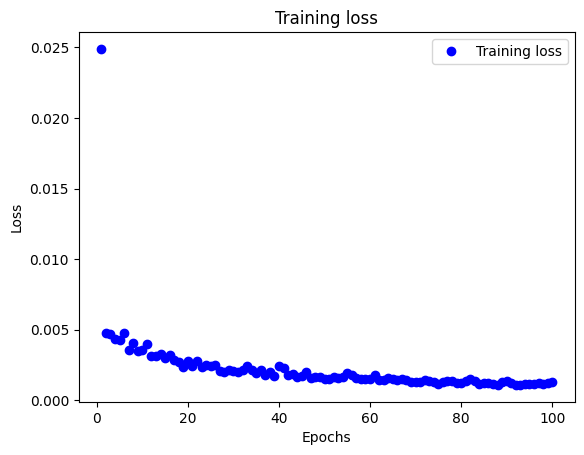

Number of data points in test data:  209
(269,)
269
[12866.30957  12996.629883 13082.639648 12968.629883 12937.790039
 12832.269531 12523.160156 12380.370117 12375.150391 12506.370117
 12630.580078 12021.049805 12093.05957  11972.55957  11707.44043
 11899.139648 11643.030273 11559.379883 11679.860352 11958.610352
 12174.94043  11908.80957  11680.410156 11633.240234 11401.209961
 11338.570313 11440.139648 11466.209961 11167.379883 10952.69043
 10833.379883 10955.290039 10817.519531 10894.44043  10697.709961
 10659.009766 11054.719727 11022.669922 11129.040039 10877.280273
 10659.950195 10484.370117 10437.       10131.820313 10742.80957
 10575.650391 10963.990234 10689.30957  10657.410156 10576.040039
 10867.070313 10996.969727 10969.019531 10971.950195 10766.200195
 11028.429688 11154.740234 10885.009766 10399.450195 10548.139648
 10363.959961 10662.099609 10607.719727 10794.990234 10969.259766
 10906.370117 11070.       11170.950195 10890.400391 10924.660156
 11171.94043  11302.929688 

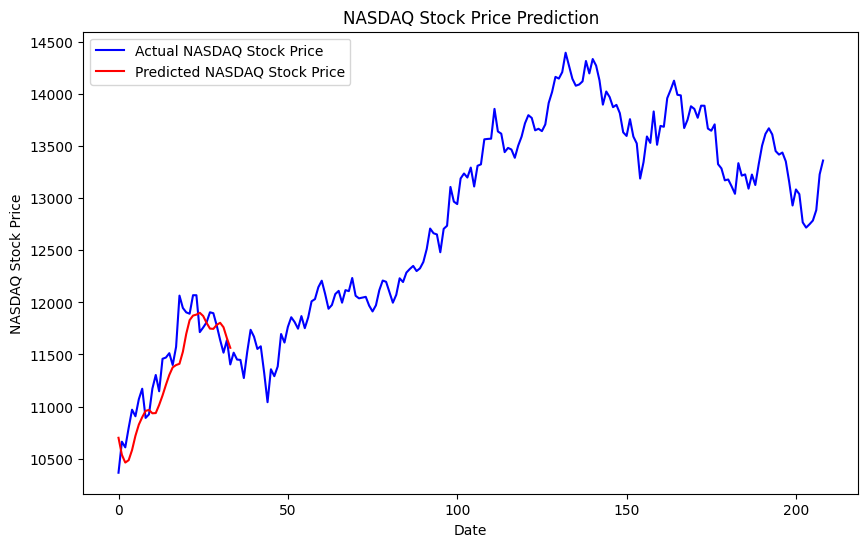

In [ ]:
# Load the NASDAQ training and testing data
nasdaq_training_complete = pd.read_csv('/content/^IXIC (4).csv')
nasdaq_testing_complete = pd.read_csv('/content/^IXIC (5).csv')

# Data preprocessing - Scaling 'Open' prices to be in the range [0, 1]
scaler = MinMaxScaler(feature_range=(0, 1))
nasdaq_training_processed = scaler.fit_transform(nasdaq_training_complete['Open'].values.reshape(-1, 1))

# Generate features and labels for training
time_steps = 60  # Number of time steps
features_set = []
labels = []

# Creating sequences of features and labels
for i in range(time_steps, len(nasdaq_training_processed)):
    features_set.append(nasdaq_training_processed[i - time_steps:i, 0])
    labels.append(nasdaq_training_processed[i, 0])

features_set, labels = np.array(features_set), np.array(labels)
features_set = np.reshape(features_set, (features_set.shape[0], features_set.shape[1], 1))  # Ensure input shape is (samples, time steps, features)

# Model creation
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(features_set.shape[1], features_set.shape[2])))  # Input shape adjusted for multiple features
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.summary()

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(features_set, labels, epochs=100, batch_size=32)

# Save the model
model.save('nasdaq.h5')

# Visualize training loss
loss = history.history['loss']
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Data preparation for testing
nasdaq_testing_complete = pd.read_csv(r'/content/^IXIC (5).csv')
nasdaq_testing_processed = nasdaq_testing_complete.iloc[:, 1:2].values

nasdaq_total = pd.concat((nasdaq_training_complete['Open'], nasdaq_testing_complete['Open']), axis=0)

# Robust feature scaling for test inputs
scaler_test = MinMaxScaler(feature_range=(0, 1))
nasdaq_total_robust = scaler_test.fit_transform(nasdaq_total.values.reshape(-1, 1))

test_inputs = nasdaq_total_robust[len(nasdaq_total_robust) - len(nasdaq_testing_complete) - 60:].reshape(-1, 1)

# Prepare test features
test_features = []
for i in range(60, len(test_inputs)):
    test_features.append(test_inputs[i - 60:i, 0])

test_features = np.array(test_features)
test_features = np.reshape(test_features, (test_features.shape[0], test_features.shape[1], 1))

# Make predictions on the test data
predictions = model.predict(test_features)
predictions = scaler_test.inverse_transform(predictions)

# Visualize the predictions against actual data
plt.figure(figsize=(10, 6))
plt.plot(nasdaq_testing_processed, color='blue', label='Actual NASDAQ Stock Price')
plt.plot(predictions, color='red', label='Predicted NASDAQ Stock Price')
plt.title('NASDAQ Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('NASDAQ Stock Price')
plt.legend()
plt.show()



# Results:

- Model Performance:

The model's architecture and parameters have been chosen to capture temporal patterns in the stock price data.
Training loss over epochs is monitored to ensure the model is learning effectively.

- Prediction Visualization:

The blue line represents the actual NASDAQ stock prices.
The red line represents the predicted stock prices by the LSTM model.
Interpretation:

Comparing the actual and predicted prices visually allows one to assess how well the model captures the underlying patterns in the stock prices.